# Esercitazione 11
  ## 9 Maggio 2023

Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x=np.array([1,2])
coeff=np.poly(x)
print(coeff)

[ 1. -3.  2.]


In [4]:
def plagr(xnodi,k):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size # numero di nodi
    if k==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:k],xnodi[k+1:n]) # nodi senza il k-esimo
    num=np.poly(xzeri) # polinomio di grado n-1
    den=np.polyval(num,xnodi[k])
    p=num/den
    return p

def InterpL(x, f, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for k in range(n):
        p=plagr(x,k)
        L[:,k]=np.polyval(p,xx)
     return np.dot(L,f)

**Sperimentazione numerica**

 
## Esercizio 1

Si disegnino i grafici dei polinomi di Lagrange associati ai nodi $\{0, 1/4, 1/2, 3/4, 1\}$ e ai nodi $\{-1, -0.7, 0.5, 2\}$.



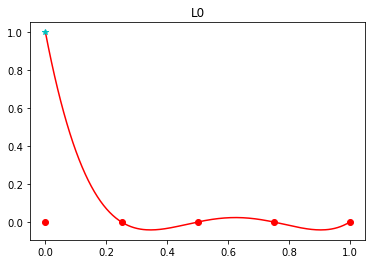

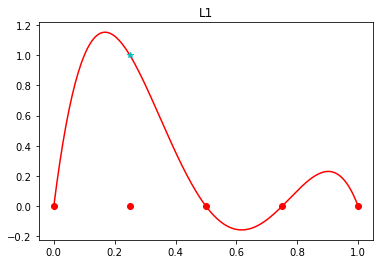

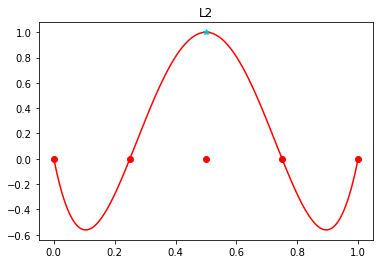

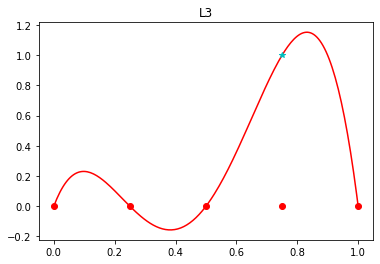

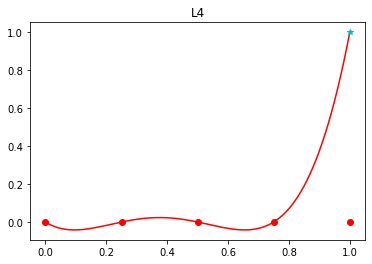

In [6]:
x=np.array([0.0, 1/4, 1/2, 3/4, 1])
n=x.shape[0] # numero di nodi
xx=np.linspace(x[0],x[n-1],200) #Disegno in questi le funzioni base di Lagrange
for i in range(n):
    p=plagr(x,i)
    L=np.polyval(p,xx)
    plt.plot(xx,L,'r-')
    plt.plot(x, np.zeros((n,)),'ro')
    plt.plot(x[i],1,'c*')
    plt.title("L"+str(i))
    plt.show()

## Esercizio 2

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.




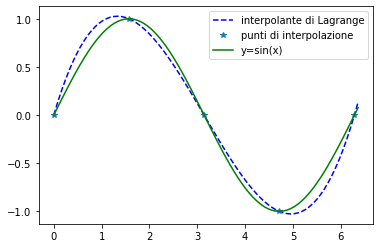

In [8]:
x=np.arange(0, 2*np.pi+0.1, np.pi/2) # nodi equispaziati
y1=np.sin(x)
xx=np.arange(0, 2*np.pi+0.1, np.pi/40) # punti in cui calcolare il polinomio
yy1=InterpL(x,y1,xx)

plt.plot(xx,yy1,'b--',x,y1,'*',xx,np.sin(xx),'g-')
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=sin(x)'])
plt.show()

y2=np.cos(x)
yy2=InterpL(x,y2,xx)
plt.plot(xx,yy2,'r--',x,y2,'*',xx,np.cos(xx),'c-')
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=cos(x)'])

## Esercizio 3
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

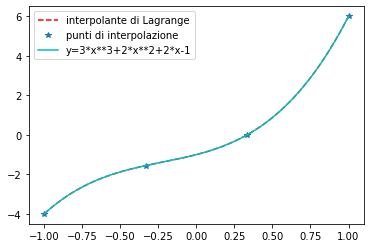

In [9]:
x=np.linspace(-1,1,4)
f= lambda x: 3*x**3+2*x**2+2*x-1
y=f(x)
xx=np.linspace(-1,1,200)
polL=InterpL(x,y ,xx)
plt.plot(xx,polL,'r--',x,y,'*',xx,f(xx),'c-')
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=3*x**3+2*x**2+2*x-1']);
#Poichè i nodi  (xi.yi) sono ottenuti valutando una funzione che è un polinomio di grado 3
# (che ha quindi derivata quarta nulle) nei punti xi,i=0,3, è nullo l'errore che si commette quando
#alla funzione che ha generato i dati si sostituisce il polinomio interpolatore di grado 3
#Vedi formula dell'errore dell'interpolazione polinomiale nelle dispense teoriche

## Esercizio 4
La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.



In [ ]:
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])
# punti di valutazione per l'interpolante
xx=np.linspace(np.min(L),np.max(L),200)
pol=InterpL(L,T,xx)
pol42=InterpL(L,T,np.array([42]))
pol_42=InterpL(L,T,np.array([-42]))
plt.plot(xx,pol,'b--',L,T,'r*',42,pol42,'og',-42,pol_42,'og')
plt.legend(['interpolante di Lagrange','punti di interpolazione','stima 1', 'stima2'])
plt.show()


## Esercizio 5 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).



In [ ]:
def zeri_Cheb(a,b,n):
    t1=(a+b)/2
    t2=(b-a)/2
    diff=[]
    x=np.zeros((n+1,))
     
    for k in range(n+1):
        x[k]=t1+t2*np.cos(((2*k+1)/(2*(n+1))*np.pi))
    return x

## Esercizio 6

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.



## Esercizio 7

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

## Esercizio 8

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.

 